<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/EDAs/EDA_kaggle_air_quality_in_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

## pandas.concat()
- 중요점 : 같은 컬럼으로 수직으로 붙임

In [2]:
df_BRAZIL = pd.read_csv('BRAZIL.csv')
df_ITALY = pd.read_csv('ITALY.csv')
df_USA = pd.read_csv('USA.csv')

In [4]:
get_data = pd.concat(objs=[df_BRAZIL,df_ITALY,df_USA])
get_data

,Date,Country,City,Specie,count,min,max,median,variance
0,14-03-2021,BRAZIL,São José dos Campos,humidity,96,48.0,100.0,88.0,2415.31
1,05-07-2021,BRAZIL,São José dos Campos,humidity,96,49.0,100.0,76.0,2248.35
2,28-09-2021,BRAZIL,São José dos Campos,humidity,96,23.0,93.0,53.0,5136.40
3,16-11-2021,BRAZIL,São José dos Campos,humidity,96,26.0,88.0,68.0,4897.40
4,22-06-2021,BRAZIL,São José dos Campos,humidity,96,82.0,100.0,93.0,357.04
...,...,...,...,...,...,...,...,...,...
179360,05-02-2021,UNITED STATES,Fort Worth,wind-speed,23,0.4,7.8,5.1,44.98
179361,06-05-2021,UNITED STATES,Fort Worth,wind-speed,22,1.4,6.0,2.8,19.19
179362,29-05-2021,UNITED STATES,Fort Worth,wind-speed,22,3.2,6.9,5.8,12.27
179363,30-07-2021,UNITED STATES,Fort Worth,wind-speed,22,0.3,7.5,2.7,53.93


## 이상치, 결측치 확인

In [5]:
get_data.isna().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

<Axes: xlabel='City', ylabel='min'>

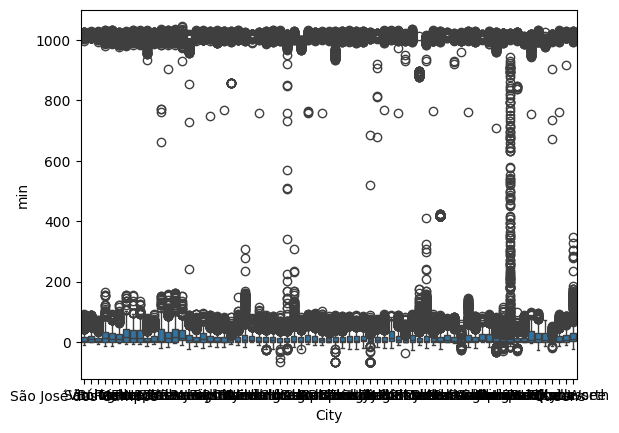

In [11]:
sns.boxplot(data=get_data[['City','min']], x='City', y='min')

<Axes: xlabel='City', ylabel='max'>

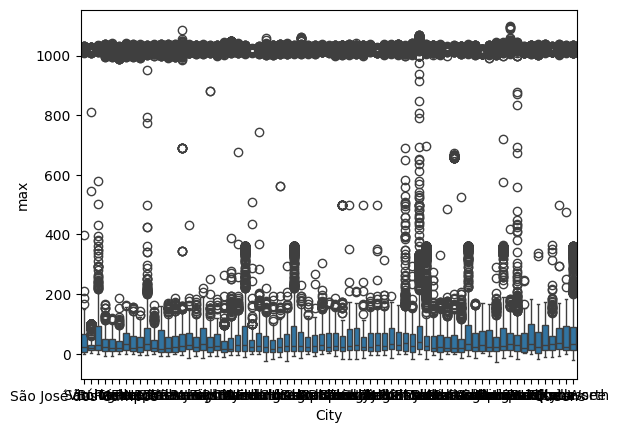

In [12]:
sns.boxplot(data=get_data[['City','max']], x='City', y='max')

<Axes: xlabel='City', ylabel='median'>

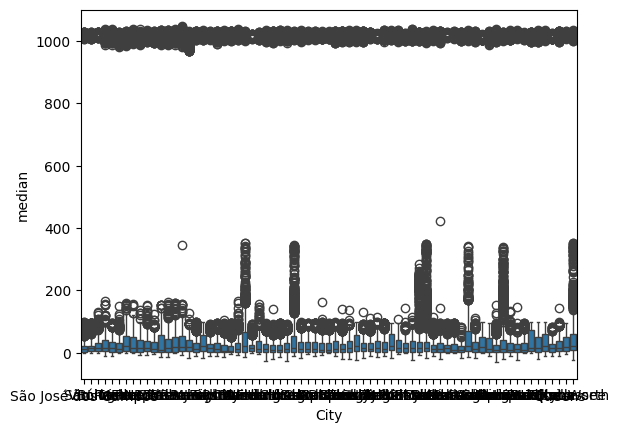

In [13]:
sns.boxplot(data=get_data[['City','median']], x='City', y='median')

<Axes: xlabel='City', ylabel='variance'>

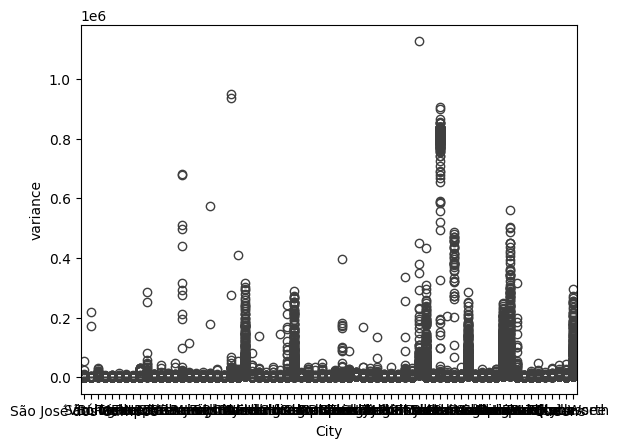

In [14]:
sns.boxplot(data=get_data[['City','variance']], x='City', y='variance')

- 뭔가 그래프들이 이상하다
- 알아보니 습도, 압력, 기온, 풍속 등 모든 값이 들어있음
- 각각의 종류별로 따로 분류 필요

### 종류(Specie)별 분류 작업

In [15]:
get_data['Specie'].unique()

array(['humidity', 'pm25', 'no2', 'pressure', 'temperature', 'co', 'pm10',
       'o3', 'wind-speed', 'wind-gust', 'so2', 'dew', 'precipitation',
       'wd'], dtype=object)

- 총 14개의 DataFrame으로 나눠서 분석 진행

In [17]:
df_pm25 = get_data.query('Specie == "pm25"').copy()
df_no2 = get_data.query('Specie == "no2"').copy()
df_pressure = get_data.query('Specie == "pressure"').copy()
df_temperature = get_data.query('Specie == "temperature"').copy()
df_co = get_data.query('Specie == "co"').copy()
df_pm10 = get_data.query('Specie == "pm10"').copy()
df_o3 = get_data.query('Specie == "o3"').copy()
df_wind_speed = get_data.query('Specie == "wind-speed"').copy()
df_wind_gust = get_data.query('Specie == "wind-gust"').copy()
df_so2 = get_data.query('Specie == "so2"').copy()
df_dew = get_data.query('Specie == "dew"').copy()
df_precipitation = get_data.query('Specie == "precipitation"').copy()
df_wd = get_data.query('Specie == "wd"').copy()

In [16]:
df_humidity = get_data.query('Specie == "humidity"').copy()
df_humidity

,Date,Country,City,Specie,count,min,max,median,variance
0,14-03-2021,BRAZIL,São José dos Campos,humidity,96,48.0,100.0,88.0,2415.31
1,05-07-2021,BRAZIL,São José dos Campos,humidity,96,49.0,100.0,76.0,2248.35
2,28-09-2021,BRAZIL,São José dos Campos,humidity,96,23.0,93.0,53.0,5136.40
3,16-11-2021,BRAZIL,São José dos Campos,humidity,96,26.0,88.0,68.0,4897.40
4,22-06-2021,BRAZIL,São José dos Campos,humidity,96,82.0,100.0,93.0,357.04
...,...,...,...,...,...,...,...,...,...
176890,02-06-2021,UNITED STATES,Fort Worth,humidity,22,53.9,98.9,70.2,3036.02
176891,22-09-2021,UNITED STATES,Fort Worth,humidity,22,18.3,69.2,34.5,2930.63
176892,02-12-2021,UNITED STATES,Fort Worth,humidity,23,35.7,88.7,68.3,3594.73
176893,15-03-2021,UNITED STATES,Fort Worth,humidity,22,17.6,76.1,30.3,4443.08


In [30]:
df_temperature.query('Country == "UNITED STATES"')['max'].sort_values()

146087    -18.6
146113    -18.3
104903    -18.0
145978    -17.9
104857    -17.7
          ...  
85020     160.5
82111     210.0
145884    292.0
120755    330.0
45907     562.5
Name: max, Length: 17634, dtype: float64

<Axes: xlabel='City', ylabel='median'>

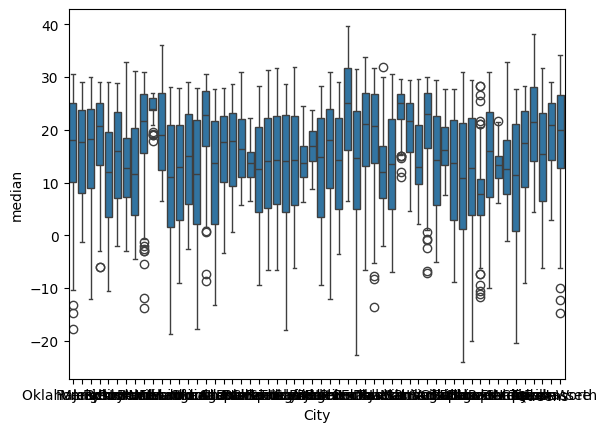

In [32]:
sns.boxplot(data=df_temperature.query('Country == "UNITED STATES"')[['City','median']], x='City', y='median')

<Axes: xlabel='City', ylabel='median'>

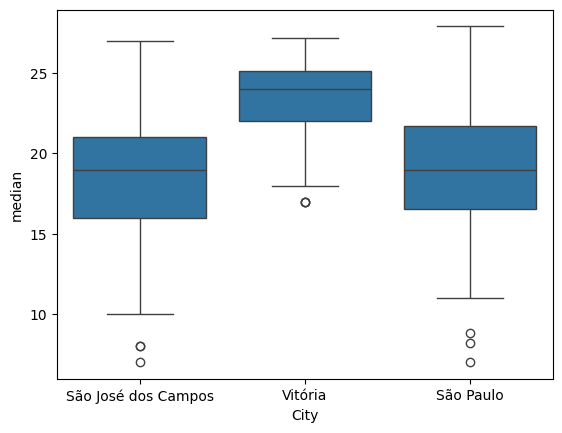

In [33]:
sns.boxplot(data=df_temperature.query('Country == "BRAZIL"')[['City','median']], x='City', y='median')

<Axes: >

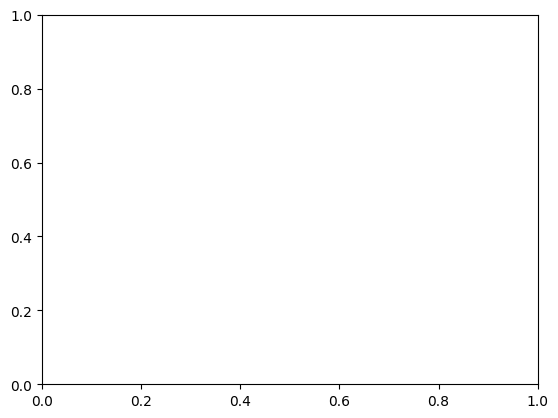

In [34]:
sns.boxplot(data=df_temperature.query('Country == "ITALY"')[['City','median']], x='City', y='median')

In [35]:
df_temperature.query('Country == "ITALY"')

,Date,Country,City,Specie,count,min,max,median,variance


## 제안 3: 공기 질 개선 전략 개발
- 문제 정의: 공기 질이 상대적으로 나쁜 지역을 대상으로 개선 전략을 모색합니다.
- 배경: 특정 지역의 공기 질이 나쁜 원인을 분석하고, 이를 개선하기 위한 구체적인 방안을 제시할 수 있습니다. 예를 들어, 교통량 감소, 산업 배출 규제 강화 등이 고려될 수 있습니다.


### 공기질 관련 데이터 프레임
- pm10, pm25 = 미세먼지 (10mm, 2.5mm)
- no2 = 이산화질소 농도
- co = 일산화탄소
- o3 = 오존
- so2 = 이산화황

- 각 도시별 미디엄 값이 가장 높은 곳을 선정 후 타 집군과의 다른 요소를 비교

In [37]:
df_Pollutant = pd.concat(objs=[df_pm10,df_pm25,df_no2,df_co,df_o3,df_so2 ])
df_Pollutant

,Date,Country,City,Specie,count,min,max,median,variance
1620,03-03-2021,BRAZIL,São José dos Campos,pm10,71,1.0,70.0,15.0,1875.31
1621,31-05-2021,BRAZIL,São José dos Campos,pm10,71,1.0,50.0,10.0,520.85
1622,27-11-2021,BRAZIL,São José dos Campos,pm10,22,1.0,77.0,11.0,3363.48
1623,04-06-2021,BRAZIL,São José dos Campos,pm10,46,10.0,74.0,28.0,1488.85
1624,22-06-2021,BRAZIL,São José dos Campos,pm10,24,6.0,54.0,11.0,945.63
...,...,...,...,...,...,...,...,...,...
175900,17-11-2021,UNITED STATES,Tallahassee,so2,46,0.1,0.2,0.1,0.01
175901,06-12-2021,UNITED STATES,Tallahassee,so2,46,0.1,0.2,0.2,0.02
175902,08-11-2021,UNITED STATES,Tallahassee,so2,38,0.1,0.3,0.1,0.04
175903,04-12-2021,UNITED STATES,Tallahassee,so2,46,0.1,0.2,0.1,0.03


- 각 도시별 총 중앙값의 합을 각각 피봇테이블로 생성

In [47]:
df_pm10['City'].unique()
pt_pm10_city_median = pd.pivot_table(data = df_pm10[['City','median']], index='City', aggfunc=sum).sort_values('median', ascending=False)
pt_pm10_city_median
# 단위 기간 내 가장 많은 미세먼지가 측정된 도시 = Fresno

,median
City,
Fresno,11086.0
Naples,9385.0
Los Angeles,8838.0
El Paso,8150.0
Milan,8007.0
Modena,7866.0
Parma,7545.0
Brescia,7450.0
Phoenix,7407.0


<Axes: xlabel='City', ylabel='median'>

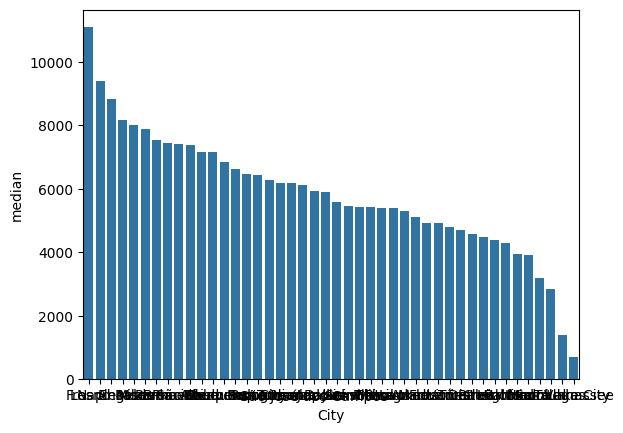

In [68]:
sns.barplot(data=pt_pm10_city_median , x='City', y='median')

- 단위 기간 내 가장 많은 미세먼지(10mm)가 측정된 도시 = Fresno
- 단위 기간 내 가장 적은 미세먼지(10mm)가 측정된 도시 = Tallahassee


* 요런 식으로 모든 오염 데이터에 대한 자료 조사

### 비교군을 위해 두 도시의 평균기온, 강수량, 기압 등을 비교 분석

In [61]:
city_list = get_data['City'].unique().tolist()

In [70]:
pt_pm10_city_median_check = pt_pm10_city_median.sort_values('City', ascending=False).copy()

#### 기압 비교

In [49]:
df_pressure.query('City == "Fresno"')['median'].mean()
# 미국 Fresno 도시의 평균 기압

1015.1996855345911

In [50]:
df_pressure.query('City == "Tallahassee"')['median'].mean()

1018.7401253918495

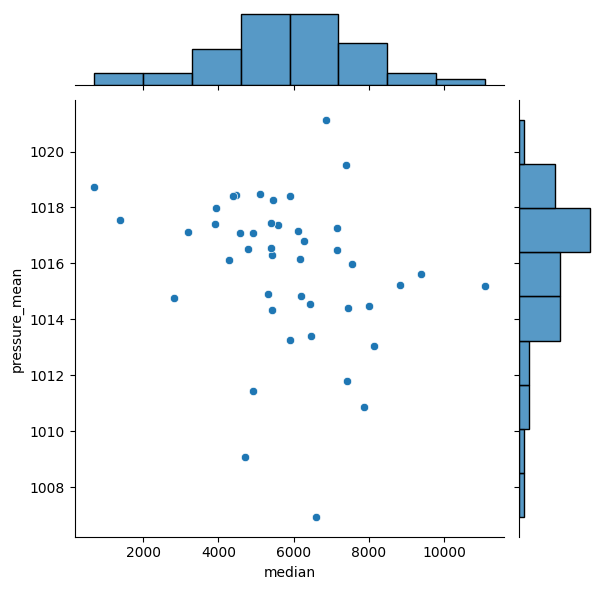

In [78]:
pt_pm10_city_median_check['pressure_mean'] = pd.pivot_table(data = df_pressure[['City','median']], index='City', aggfunc=np.mean).sort_values('City', ascending=False)
sns.jointplot(data=pt_pm10_city_median_check, x='median', y='pressure_mean')

- 기압이 높을 수록 미세먼지의 농도가 높아지는 현상을 확인

#### 기온 비교

In [51]:
df_temperature.query('City == "Fresno"')['median'].mean()

19.721383647798742

In [52]:
df_temperature.query('City == "Tallahassee"')['median'].mean()

19.4717868338558

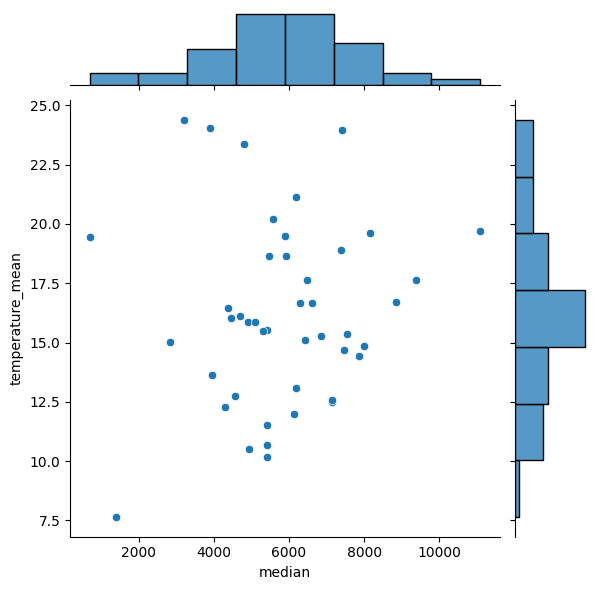

In [77]:
pt_pm10_city_median_check['temperature_mean'] = pd.pivot_table(data = df_temperature[['City','median']], index='City', aggfunc=np.mean).sort_values('City', ascending=False)
sns.jointplot(data=pt_pm10_city_median_check, x='median', y='temperature_mean')

- 기온과 미세먼지간에는 정방향간 상관관계를 보이는 것으로 보임

#### 풍속 비교

In [53]:
df_wind_speed.query('City == "Fresno"')['median'].mean()

1.9493710691823896

In [55]:
df_wind_speed.query('City == "Tallahassee"')['median'].mean()

2.707523510971787

In [69]:
pd.pivot_table(data = df_wind_speed[['City','median']], index='City', aggfunc=np.mean).sort_values('median', ascending=False)

,median
City,
Fort Worth,7.043131
Dallas,6.676415
The Bronx,5.747335
San Antonio,5.062696
Oklahoma City,5.045141
...,...
Indianapolis,1.403762
Jacksonville,1.386478
Modena,1.214465


In [71]:
pt_pm10_city_median_check['wind_mean'] = pd.pivot_table(data = df_wind_speed[['City','median']], index='City', aggfunc=np.mean).sort_values('City', ascending=False)
pt_pm10_city_median_check

,median,wind_mean
City,,
Vitória,4790.0,3.724149
Tucson,6191.0,1.943253
Trieste,4707.0,2.881424
Tallahassee,697.0,2.707524
São Paulo,7389.0,3.133542
São José dos Campos,5914.0,2.348428
Salt Lake City,1394.0,2.523824
Saint Paul,5421.0,2.898746
Sacramento,6286.0,2.488365


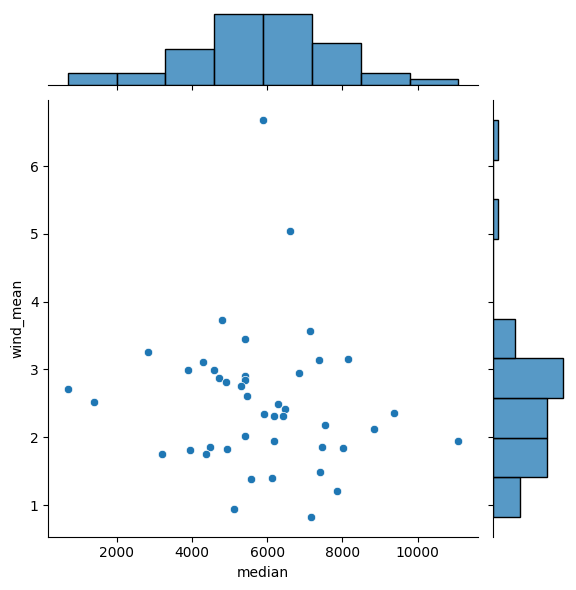

In [73]:
sns.jointplot(data=pt_pm10_city_median_check, x='median', y='wind_mean')

- 평균 풍속이 강한 도시의 미세먼지가 적게 측정되었을 확률 있음

#### 이슬량 비교

In [56]:
df_dew.query('City == "Fresno"')['median'].mean()

6.886392405063291

In [57]:
df_dew.query('City == "Tallahassee"')['median'].mean()

14.46112852664577

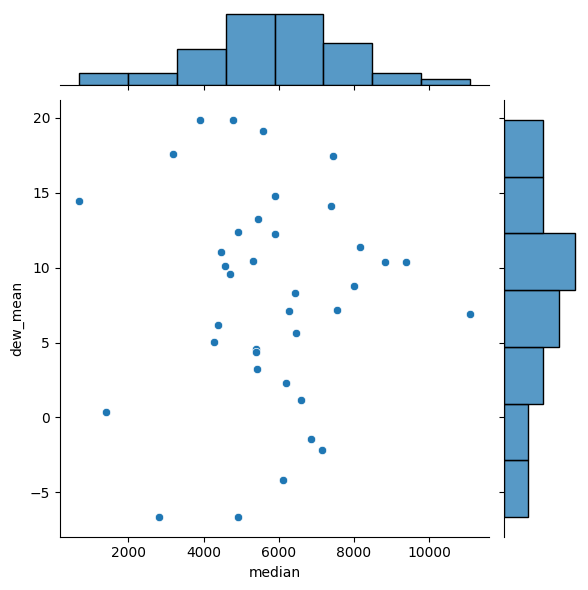

In [76]:
pt_pm10_city_median_check['dew_mean'] = pd.pivot_table(data = df_dew[['City','median']], index='City', aggfunc=np.mean).sort_values('City', ascending=False)
sns.jointplot(data=pt_pm10_city_median_check, x='median', y='dew_mean')

- 분포도가 균일하여 서로의 상관관계는 정방향 상관관계일것으로 예상

#### 강수량 비교

In [58]:
df_precipitation.query('City == "Fresno"')['median'].mean()

nan

In [59]:
df_precipitation.query('City == "Tallahassee"')['median'].mean()

nan

- 두 도시의 강수량값이 없어 비교 불가

- 이런 식으로 모든 오염물질에 대하여 상관관계 비교........

현재까지의 분석 결과
1) 바람이 많이 부는 곳에서는 미세먼지의 평균 농도가 적어지는 것을 알 수 있었다.
따라서 바람이 많이 불지 않는 곳에서는 공장 등을 건설하더라도 풍향에 맞추거나 멀리 떨어진 곳에 건설하는 것을 추진하면 효과적이지 않을까 사료된다.
2) 기압이 높은 곳에서 미세먼지 농도가 높아지는 것을 확인하였으므로, 기압이 높은 곳에서는 되도록 공장을... 어떻게 하지?